In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
out_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



612

In [3]:
# city_df = pd.DataFrame(cities)
# city_df.head()

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&params&APPID={api_key}"


In [5]:
# Create empty lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# call counter 
record = 1

# Log file print statement
print(f"Lets get this party started!!")
print(f"-------------------------------")


#Loop
for city in cities:  
    
    # Try  to append calls
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Hit {record} | {city_record}")
      

        record= record + 1 
        
    # If no record found "skip" to next call
    except:
        print("WTF")
    continue

Lets get this party started!!
-------------------------------
Hit 1 | Mataura
Hit 2 | Kolosovka
Hit 3 | Half Moon Bay
Hit 4 | Albany
Hit 5 | Perehonivka
Hit 6 | Kapaa
Hit 7 | Marand
Hit 8 | Busselton
Hit 9 | Kahului
Hit 10 | Hermanus
WTF
Hit 11 | Butaritari
WTF
Hit 12 | Kaitangata
Hit 13 | Bairnsdale
Hit 14 | Airai
Hit 15 | Puro
Hit 16 | Olinda
Hit 17 | Provideniya
Hit 18 | Torbay
Hit 19 | Tuatapere
Hit 20 | Abu Dhabi
Hit 21 | Qiongshan
Hit 22 | Chhapar
Hit 23 | Cape Town
Hit 24 | Port Alfred
Hit 25 | Dikson
Hit 26 | Qaanaaq
Hit 27 | Vostochnyy
Hit 28 | Coquimbo
Hit 29 | Rikitea
Hit 30 | San Patricio
Hit 31 | Monrovia
Hit 32 | Bereda
Hit 33 | Bluff
Hit 34 | Vaini
Hit 35 | Sao Filipe
Hit 36 | Upernavik
Hit 37 | Punta Arenas
Hit 38 | Tiksi
WTF
Hit 39 | San Lorenzo
Hit 40 | Cabo San Lucas
WTF
Hit 41 | Saint-Augustin
Hit 42 | Cobija
Hit 43 | Vaitape
Hit 44 | Vostok
Hit 45 | Astoria
Hit 46 | Utica
Hit 47 | Tromso
Hit 48 | Ende
Hit 49 | Arraial do Cabo
Hit 50 | Qaqortoq
Hit 51 | Avarua
Hit 5

Hit 418 | Jumla
Hit 419 | Nazarovo
Hit 420 | Saurimo
Hit 421 | Tarko-Sale
Hit 422 | Conway
Hit 423 | Huilong
Hit 424 | Mackenzie
Hit 425 | Esperance
Hit 426 | Wawa
Hit 427 | Meleuz
Hit 428 | Nicoya
Hit 429 | Rangapara
Hit 430 | Svobodnyy
Hit 431 | Vila
Hit 432 | Port-Gentil
WTF
Hit 433 | Nyuksenitsa
Hit 434 | Nyurba
Hit 435 | Evensk
Hit 436 | Wanning
Hit 437 | Touros
Hit 438 | Flinders
WTF
Hit 439 | Kralendijk
Hit 440 | Loukhi
Hit 441 | Kamaishi
Hit 442 | Jaguarao
Hit 443 | Tessalit
Hit 444 | Sisimiut
Hit 445 | Belle Fourche
WTF
Hit 446 | Preili
WTF
Hit 447 | Abu Samrah
Hit 448 | Barranca
Hit 449 | Shimanovsk
WTF
Hit 450 | Deputatskiy
Hit 451 | Arinos
Hit 452 | Sioux Lookout
Hit 453 | Novokorsunskaya
Hit 454 | Hirara
Hit 455 | Svetlogorsk
Hit 456 | Launceston
Hit 457 | Victor Harbor
Hit 458 | Larsnes
Hit 459 | Veroia
Hit 460 | Samarai
Hit 461 | Viedma
Hit 462 | Garoua
WTF
WTF
Hit 463 | Makakilo City
Hit 464 | Tosno
Hit 465 | Gamba
Hit 466 | Pochinki
Hit 467 | Banda Aceh
Hit 468 | Uruca

In [6]:
# Creating dictionary
column_names = {"City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

In [7]:
# Create Dataframe
city_weather_data = pd.DataFrame(column_names)

# Count to make sure all rows are filled
city_weather_data.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [8]:
city_weather_data.to_csv('weather_data_CSV.csv')


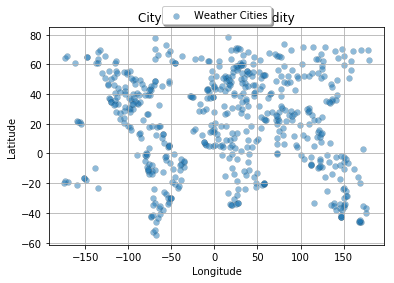

In [9]:
 #Scatter plot for the selected coordinates  
plt.scatter(city_weather_data.Lng, 
            city_weather_data.Lat,
            edgecolor='black', linewidths=.15, marker="o", 
            alpha=0.5, label="Weather Cities")

# Incorporate the other graph properties
#plt.title("Selected LATS & LNGS")
plt.title(f"City Latitude vs. Humidity")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=3, fancybox=True, shadow=True)
plt.grid(True)

# Show plot
plt.show()

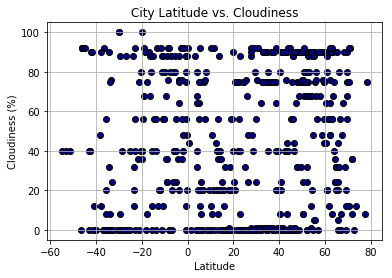

In [10]:
x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Cloudiness']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("LatitudeVsCloudiness.png")
plt.show()

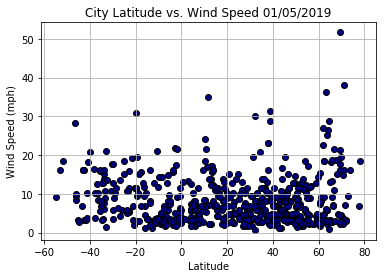

In [11]:
x_axis = city_weather_data['Lat']
y_axis = city_weather_data['Wind Speed']

plt.scatter(x_axis, y_axis, c='navy', edgecolors='black', alpha=1)

plt.title(f"City Latitude vs. Wind Speed {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("LatitudeVsWindSpeed.png")
plt.show()